

# 项目：调查IMDB电影数据集

## 目录
<ul>
<li><a href="#intro">简介</a></li>
<li><a href="#wrangling">数据整理</a></li>
<li><a href="#eda">探索性数据分析</a></li>
<li><a href="#conclusions">结论</a></li>
</ul>

<a id='intro'></a>
## 简介
本数据集中包含 1 万条电影信息，信息来源为“电影数据库”（TMDb，The Movie Database），包括用户评分和票房。“演职人员 (cast)”、“电影类别 (genres)”等数据列包含由竖线字符（|）分隔的多个数值。“演职人员 (cast) ”列中有一些奇怪的字符。
通过观察数据我们可以尝试回答以下问题：
>（1）每年最受欢迎的电影是那些类别
>（2）盈利最多的电影有哪些特点



In [17]:
# 用这个框对你计划使用的所有数据包进行设置
#   导入语句。
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline



# 务必包含一个‘magic word’（带有“%”的***），以便将你的视图
#   与 notebook 保持一致。关于更多信息，请访问该网页：
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## 数据整理


### 常规属性

In [18]:
# 加载数据并打印几行。进行这几项操作，来检查数据
#   类型，以及是否有缺失数据或错误数据的情况。
df=pd.read_csv('tmdb-movies.csv')

df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1



### 1.1数据清理（提取有可能需要用到的列，组成新的dataframe）

> 因为
> 问题一：每年最受欢迎的电影是那些类别---可能用到的列：popularity，orginal title,genres,release year
> 问题二：盈利最多的电影有哪些特点---可能用到的列：budget,revenue,original_title,cast,director,genres，release year，release date，production_company



In [20]:
df=df[['original_title','popularity','genres','release_year','release_date','budget','revenue','cast','production_companies']]
df.head()

,original_title,popularity,genres,release_year,release_date,budget,revenue,cast,production_companies
0,Jurassic World,32.985763,Action|Adventure|Science Fiction|Thriller,2015,6/9/15,150000000,1513528810,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Universal Studios|Amblin Entertainment|Legenda...
1,Mad Max: Fury Road,28.419936,Action|Adventure|Science Fiction|Thriller,2015,5/13/15,150000000,378436354,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,Village Roadshow Pictures|Kennedy Miller Produ...
2,Insurgent,13.112507,Adventure|Science Fiction|Thriller,2015,3/18/15,110000000,295238201,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Summit Entertainment|Mandeville Films|Red Wago...
3,Star Wars: The Force Awakens,11.173104,Action|Adventure|Science Fiction|Fantasy,2015,12/15/15,200000000,2068178225,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,Lucasfilm|Truenorth Productions|Bad Robot
4,Furious 7,9.335014,Action|Crime|Thriller,2015,4/1/15,190000000,1506249360,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,Universal Pictures|Original Film|Media Rights ...


### 1.2数据清理（寻找并处理重复行）

In [21]:
sum(df.duplicated())

1

In [22]:
#从上面知道，有一行是完全重复的，对其进行操作
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 9 columns):
original_title          10865 non-null object
popularity              10865 non-null float64
genres                  10842 non-null object
release_year            10865 non-null int64
release_date            10865 non-null object
budget                  10865 non-null int64
revenue                 10865 non-null int64
cast                    10789 non-null object
production_companies    9835 non-null object
dtypes: float64(1), int64(3), object(5)
memory usage: 848.8+ KB


In [23]:
df.head()

,original_title,popularity,genres,release_year,release_date,budget,revenue,cast,production_companies
0,Jurassic World,32.985763,Action|Adventure|Science Fiction|Thriller,2015,6/9/15,150000000,1513528810,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Universal Studios|Amblin Entertainment|Legenda...
1,Mad Max: Fury Road,28.419936,Action|Adventure|Science Fiction|Thriller,2015,5/13/15,150000000,378436354,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,Village Roadshow Pictures|Kennedy Miller Produ...
2,Insurgent,13.112507,Adventure|Science Fiction|Thriller,2015,3/18/15,110000000,295238201,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Summit Entertainment|Mandeville Films|Red Wago...
3,Star Wars: The Force Awakens,11.173104,Action|Adventure|Science Fiction|Fantasy,2015,12/15/15,200000000,2068178225,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,Lucasfilm|Truenorth Productions|Bad Robot
4,Furious 7,9.335014,Action|Crime|Thriller,2015,4/1/15,190000000,1506249360,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,Universal Pictures|Original Film|Media Rights ...


### 1.3数据清理（将复杂的字符串分解）

> 通过上面的输出结果，以下列是多个字符串，需要分解：genres,cast,production_companies


In [24]:
df_temp=df['genres'].str.split('|',expand=True) 
df_temp.head()
#由下面的结果知道，生成了5列

,0,1,2,3,4
0,Action,Adventure,Science Fiction,Thriller,None
1,Action,Adventure,Science Fiction,Thriller,None
2,Adventure,Science Fiction,Thriller,None,None
3,Action,Adventure,Science Fiction,Fantasy,None
4,Action,Crime,Thriller,None,None


In [25]:
df_temp=df['cast'].str.split('|',expand=True) 
df_temp.head()

,0,1,2,3,4
0,Chris Pratt,Bryce Dallas Howard,Irrfan Khan,Vincent D'Onofrio,Nick Robinson
1,Tom Hardy,Charlize Theron,Hugh Keays-Byrne,Nicholas Hoult,Josh Helman
2,Shailene Woodley,Theo James,Kate Winslet,Ansel Elgort,Miles Teller
3,Harrison Ford,Mark Hamill,Carrie Fisher,Adam Driver,Daisy Ridley
4,Vin Diesel,Paul Walker,Jason Statham,Michelle Rodriguez,Dwayne Johnson


In [26]:
df_temp=df['production_companies'].str.split('|',expand=True) 
df_temp.head()

,0,1,2,3,4
0,Universal Studios,Amblin Entertainment,Legendary Pictures,Fuji Television Network,Dentsu
1,Village Roadshow Pictures,Kennedy Miller Productions,None,None,None
2,Summit Entertainment,Mandeville Films,Red Wagon Entertainment,NeoReel,None
3,Lucasfilm,Truenorth Productions,Bad Robot,None,None
4,Universal Pictures,Original Film,Media Rights Capital,Dentsu,One Race Films


In [27]:
#通过上面的计算，各个列都会被扩展成5列，所以：
df[['g1','g2','g3','g4','g5']]=df['genres'].str.split('|',expand=True)
df[['c1','c2','c3','c4','c5']]=df['cast'].str.split('|',expand=True)
df[['p1','p2','p3','p4','p5']]=df['production_companies'].str.split('|',expand=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 24 columns):
original_title          10865 non-null object
popularity              10865 non-null float64
genres                  10842 non-null object
release_year            10865 non-null int64
release_date            10865 non-null object
budget                  10865 non-null int64
revenue                 10865 non-null int64
cast                    10789 non-null object
production_companies    9835 non-null object
g1                      10842 non-null object
g2                      8514 non-null object
g3                      5078 non-null object
g4                      1980 non-null object
g5                      541 non-null object
c1                      10789 non-null object
c2                      10645 non-null object
c3                      10555 non-null object
c4                      10446 non-null object
c5                      10133 non-null object
p1                      9

In [28]:
df.head()

,original_title,popularity,genres,release_year,release_date,budget,revenue,cast,production_companies,g1,...,c1,c2,c3,c4,c5,p1,p2,p3,p4,p5
0,Jurassic World,32.985763,Action|Adventure|Science Fiction|Thriller,2015,6/9/15,150000000,1513528810,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Universal Studios|Amblin Entertainment|Legenda...,Action,...,Chris Pratt,Bryce Dallas Howard,Irrfan Khan,Vincent D'Onofrio,Nick Robinson,Universal Studios,Amblin Entertainment,Legendary Pictures,Fuji Television Network,Dentsu
1,Mad Max: Fury Road,28.419936,Action|Adventure|Science Fiction|Thriller,2015,5/13/15,150000000,378436354,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,Village Roadshow Pictures|Kennedy Miller Produ...,Action,...,Tom Hardy,Charlize Theron,Hugh Keays-Byrne,Nicholas Hoult,Josh Helman,Village Roadshow Pictures,Kennedy Miller Productions,None,None,None
2,Insurgent,13.112507,Adventure|Science Fiction|Thriller,2015,3/18/15,110000000,295238201,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Summit Entertainment|Mandeville Films|Red Wago...,Adventure,...,Shailene Woodley,Theo James,Kate Winslet,Ansel Elgort,Miles Teller,Summit Entertainment,Mandeville Films,Red Wagon Entertainment,NeoReel,None
3,Star Wars: The Force Awakens,11.173104,Action|Adventure|Science Fiction|Fantasy,2015,12/15/15,200000000,2068178225,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,Lucasfilm|Truenorth Productions|Bad Robot,Action,...,Harrison Ford,Mark Hamill,Carrie Fisher,Adam Driver,Daisy Ridley,Lucasfilm,Truenorth Productions,Bad Robot,None,None
4,Furious 7,9.335014,Action|Crime|Thriller,2015,4/1/15,190000000,1506249360,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,Universal Pictures|Original Film|Media Rights ...,Action,...,Vin Diesel,Paul Walker,Jason Statham,Michelle Rodriguez,Dwayne Johnson,Universal Pictures,Original Film,Media Rights Capital,Dentsu,One Race Films


### 1.4数据清理（处理缺省值）

> 通过上面的输出结果，我们知道总行数为10865，所以以下列存在缺省值：cast,director,genres,production_companies
> 注意到上述缺省列大部分为string 类型，无法用平均值进行填充，所以下面用0填充缺省处

In [29]:

# 用0去填充缺省值
df.fillna(0, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 24 columns):
original_title          10865 non-null object
popularity              10865 non-null float64
genres                  10865 non-null object
release_year            10865 non-null int64
release_date            10865 non-null object
budget                  10865 non-null int64
revenue                 10865 non-null int64
cast                    10865 non-null object
production_companies    10865 non-null object
g1                      10865 non-null object
g2                      10865 non-null object
g3                      10865 non-null object
g4                      10865 non-null object
g5                      10865 non-null object
c1                      10865 non-null object
c2                      10865 non-null object
c3                      10865 non-null object
c4                      10865 non-null object
c5                      10865 non-null object
p1                 

In [30]:
df.head()

,original_title,popularity,genres,release_year,release_date,budget,revenue,cast,production_companies,g1,...,c1,c2,c3,c4,c5,p1,p2,p3,p4,p5
0,Jurassic World,32.985763,Action|Adventure|Science Fiction|Thriller,2015,6/9/15,150000000,1513528810,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Universal Studios|Amblin Entertainment|Legenda...,Action,...,Chris Pratt,Bryce Dallas Howard,Irrfan Khan,Vincent D'Onofrio,Nick Robinson,Universal Studios,Amblin Entertainment,Legendary Pictures,Fuji Television Network,Dentsu
1,Mad Max: Fury Road,28.419936,Action|Adventure|Science Fiction|Thriller,2015,5/13/15,150000000,378436354,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,Village Roadshow Pictures|Kennedy Miller Produ...,Action,...,Tom Hardy,Charlize Theron,Hugh Keays-Byrne,Nicholas Hoult,Josh Helman,Village Roadshow Pictures,Kennedy Miller Productions,0,0,0
2,Insurgent,13.112507,Adventure|Science Fiction|Thriller,2015,3/18/15,110000000,295238201,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Summit Entertainment|Mandeville Films|Red Wago...,Adventure,...,Shailene Woodley,Theo James,Kate Winslet,Ansel Elgort,Miles Teller,Summit Entertainment,Mandeville Films,Red Wagon Entertainment,NeoReel,0
3,Star Wars: The Force Awakens,11.173104,Action|Adventure|Science Fiction|Fantasy,2015,12/15/15,200000000,2068178225,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,Lucasfilm|Truenorth Productions|Bad Robot,Action,...,Harrison Ford,Mark Hamill,Carrie Fisher,Adam Driver,Daisy Ridley,Lucasfilm,Truenorth Productions,Bad Robot,0,0
4,Furious 7,9.335014,Action|Crime|Thriller,2015,4/1/15,190000000,1506249360,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,Universal Pictures|Original Film|Media Rights ...,Action,...,Vin Diesel,Paul Walker,Jason Statham,Michelle Rodriguez,Dwayne Johnson,Universal Pictures,Original Film,Media Rights Capital,Dentsu,One Race Films


### 1.5数据清理（更改数据类型）

> > 通过上面的输出结果，我们知道以下列的数据类型存在问题，需要转换：release_date

In [31]:
#因为我不需要精确到具体哪一天，所以只提取month
df['release_date']=pd.to_datetime(df['release_date']).dt.month
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 24 columns):
original_title          10865 non-null object
popularity              10865 non-null float64
genres                  10865 non-null object
release_year            10865 non-null int64
release_date            10865 non-null int64
budget                  10865 non-null int64
revenue                 10865 non-null int64
cast                    10865 non-null object
production_companies    10865 non-null object
g1                      10865 non-null object
g2                      10865 non-null object
g3                      10865 non-null object
g4                      10865 non-null object
g5                      10865 non-null object
c1                      10865 non-null object
c2                      10865 non-null object
c3                      10865 non-null object
c4                      10865 non-null object
c5                      10865 non-null object
p1                  

In [32]:
#到此，原始数据处理完毕
df.head()

,original_title,popularity,genres,release_year,release_date,budget,revenue,cast,production_companies,g1,...,c1,c2,c3,c4,c5,p1,p2,p3,p4,p5
0,Jurassic World,32.985763,Action|Adventure|Science Fiction|Thriller,2015,6,150000000,1513528810,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Universal Studios|Amblin Entertainment|Legenda...,Action,...,Chris Pratt,Bryce Dallas Howard,Irrfan Khan,Vincent D'Onofrio,Nick Robinson,Universal Studios,Amblin Entertainment,Legendary Pictures,Fuji Television Network,Dentsu
1,Mad Max: Fury Road,28.419936,Action|Adventure|Science Fiction|Thriller,2015,5,150000000,378436354,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,Village Roadshow Pictures|Kennedy Miller Produ...,Action,...,Tom Hardy,Charlize Theron,Hugh Keays-Byrne,Nicholas Hoult,Josh Helman,Village Roadshow Pictures,Kennedy Miller Productions,0,0,0
2,Insurgent,13.112507,Adventure|Science Fiction|Thriller,2015,3,110000000,295238201,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Summit Entertainment|Mandeville Films|Red Wago...,Adventure,...,Shailene Woodley,Theo James,Kate Winslet,Ansel Elgort,Miles Teller,Summit Entertainment,Mandeville Films,Red Wagon Entertainment,NeoReel,0
3,Star Wars: The Force Awakens,11.173104,Action|Adventure|Science Fiction|Fantasy,2015,12,200000000,2068178225,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,Lucasfilm|Truenorth Productions|Bad Robot,Action,...,Harrison Ford,Mark Hamill,Carrie Fisher,Adam Driver,Daisy Ridley,Lucasfilm,Truenorth Productions,Bad Robot,0,0
4,Furious 7,9.335014,Action|Crime|Thriller,2015,4,190000000,1506249360,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,Universal Pictures|Original Film|Media Rights ...,Action,...,Vin Diesel,Paul Walker,Jason Statham,Michelle Rodriguez,Dwayne Johnson,Universal Pictures,Original Film,Media Rights Capital,Dentsu,One Race Films


<a id='eda'></a>
## 探索性数据分析



### 研究问题 1（每年最受欢迎的电影是那些类别  ）

> 根据这个问题，我认为需要用到的列是：popularity,release_year，和genres(g1...g5)

In [33]:
df['release_year'].min(),  df['release_year'].max()

(1960, 2015)

> 通过上面的结果，我们知道，需要找出从1960年到2015年，每年最受欢迎的电影

In [34]:
#先按照popularity排好序，然后按照release——year分组，最后每组取第一个
df1=df.sort_values('popularity', ascending=False).groupby('release_year', as_index=False).first()
df1

,release_year,original_title,popularity,genres,release_date,budget,revenue,cast,production_companies,g1,...,c1,c2,c3,c4,c5,p1,p2,p3,p4,p5
0,1960,Psycho,2.610362,Drama|Horror|Thriller,8,806948,32000000,Anthony Perkins|Vera Miles|John Gavin|Janet Le...,Shamley Productions,Drama,...,Anthony Perkins,Vera Miles,John Gavin,Janet Leigh,Martin Balsam,Shamley Productions,0,0,0,0
1,1961,One Hundred and One Dalmatians,2.631987,Adventure|Animation|Comedy|Family,1,4000000,215880014,Rod Taylor|J. Pat O'Malley|Betty Lou Gerson|Ma...,Walt Disney Productions,Adventure,...,Rod Taylor,J. Pat O'Malley,Betty Lou Gerson,Martha Wentworth,Ben Wright,Walt Disney Productions,0,0,0,0
2,1962,Dr. No,3.170651,Adventure|Action|Thriller,10,1100000,59600000,Sean Connery|Ursula Andress|Joseph Wiseman|Jac...,Eon Productions|Metro-Goldwyn-Mayer (MGM),Adventure,...,Sean Connery,Ursula Andress,Joseph Wiseman,Jack Lord,Bernard Lee,Eon Productions,Metro-Goldwyn-Mayer (MGM),0,0,0
3,1963,From Russia With Love,2.508235,Action|Thriller|Adventure,10,2500000,78898765,Sean Connery|Daniela Bianchi|Lotte Lenya|Rober...,Eon Productions|Metro-Goldwyn-Mayer (MGM)|Danjaq,Action,...,Sean Connery,Daniela Bianchi,Lotte Lenya,Robert Shaw,Bernard Lee,Eon Productions,Metro-Goldwyn-Mayer (MGM),Danjaq,0,0
4,1964,Goldfinger,3.153791,Adventure|Action|Thriller,9,3500000,124900000,Sean Connery|Honor Blackman|Gert FrÃ¶be|Shirle...,Eon Productions|Metro-Goldwyn-Mayer (MGM),Adventure,...,Sean Connery,Honor Blackman,Gert FrÃ¶be,Shirley Eaton,Tania Mallet,Eon Productions,Metro-Goldwyn-Mayer (MGM),0,0,0
5,1965,Thunderball,1.910465,Adventure|Action|Thriller,12,11000000,141195658,Sean Connery|Claudine Auger|Adolfo Celi|Lucian...,Eon Productions|Metro-Goldwyn-Mayer (MGM),Adventure,...,Sean Connery,Claudine Auger,Adolfo Celi,Luciana Paluzzi,Rik Van Nutter,Eon Productions,Metro-Goldwyn-Mayer (MGM),0,0,0
6,1966,How the Grinch Stole Christmas!,1.227582,Animation|Family|Comedy,12,315000,0,Boris Karloff|June Foray|Thurl Ravenscroft|Dal...,MGM Television|The Cat in the Hat Productions,Animation,...,Boris Karloff,June Foray,Thurl Ravenscroft,Dal McKennon,0,MGM Television,The Cat in the Hat Productions,0,0,0
7,1967,The Jungle Book,2.550704,Family|Animation|Adventure,10,4000000,205843612,Phil Harris|Sebastian Cabot|Louis Prima|George...,Walt Disney Pictures,Family,...,Phil Harris,Sebastian Cabot,Louis Prima,George Sanders,Sterling Holloway,Walt Disney Pictures,0,0,0,0
8,1968,2001: A Space Odyssey,3.309196,Science Fiction|Mystery|Adventure,4,12000000,56715371,Keir Dullea|Douglas Rain|Gary Lockwood|William...,Stanley Kubrick Productions|Metro-Goldwyn-Maye...,Science Fiction,...,Keir Dullea,Douglas Rain,Gary Lockwood,William Sylvester,Daniel Richter,Stanley Kubrick Productions,Metro-Goldwyn-Mayer (MGM),0,0,0
9,1969,On Her Majesty's Secret Service,1.778746,Adventure|Action|Thriller,12,7000000,81974493,George Lazenby|Diana Rigg|Telly Savalas|Gabrie...,Eon Productions|Metro-Goldwyn-Mayer (MGM)|Danjaq,Adventure,...,George Lazenby,Diana Rigg,Telly Savalas,Gabriele Ferzetti,Ilse Steppat,Eon Productions,Metro-Goldwyn-Mayer (MGM),Danjaq,0,0


> 通过上面的结果，我们已经找出从1960年到2015年，每年最受欢迎的电影，可以从genres列，看出他们是那些类别。
> 如果想要进一步分析这些电影的类别集中在那些地方

In [35]:

df_g=(df1[['g1','g2','g3','g4','g5']] ).apply(pd.value_counts)   
df_g

,g1,g2,g3,g4,g5
Action,10.0,14.0,4.0,NaN,NaN
Adventure,17.0,5.0,6.0,1.0,1.0
Animation,5.0,3.0,1.0,NaN,NaN
Comedy,2.0,2.0,2.0,1.0,NaN
Crime,3.0,3.0,1.0,NaN,NaN
Drama,6.0,6.0,1.0,NaN,NaN
Family,1.0,4.0,4.0,2.0,NaN
Fantasy,1.0,7.0,1.0,1.0,NaN
Horror,2.0,1.0,1.0,NaN,NaN
Music,1.0,NaN,NaN,NaN,1.0


In [36]:
#去掉没有意义的倒数第二行
df_g.drop([0], inplace=True)

#填充nan值，方便计算
df_g.fillna(0, inplace=True)
df_g

,g1,g2,g3,g4,g5
Action,10.0,14.0,4.0,0.0,0.0
Adventure,17.0,5.0,6.0,1.0,1.0
Animation,5.0,3.0,1.0,0.0,0.0
Comedy,2.0,2.0,2.0,1.0,0.0
Crime,3.0,3.0,1.0,0.0,0.0
Drama,6.0,6.0,1.0,0.0,0.0
Family,1.0,4.0,4.0,2.0,0.0
Fantasy,1.0,7.0,1.0,1.0,0.0
Horror,2.0,1.0,1.0,0.0,0.0
Music,1.0,0.0,0.0,0.0,1.0


In [37]:
df_g['Col_sum'] = df_g.apply(lambda x: x.sum(), axis=1)
df_g

,g1,g2,g3,g4,g5,Col_sum
Action,10.0,14.0,4.0,0.0,0.0,28.0
Adventure,17.0,5.0,6.0,1.0,1.0,30.0
Animation,5.0,3.0,1.0,0.0,0.0,9.0
Comedy,2.0,2.0,2.0,1.0,0.0,7.0
Crime,3.0,3.0,1.0,0.0,0.0,7.0
Drama,6.0,6.0,1.0,0.0,0.0,13.0
Family,1.0,4.0,4.0,2.0,0.0,11.0
Fantasy,1.0,7.0,1.0,1.0,0.0,10.0
Horror,2.0,1.0,1.0,0.0,0.0,4.0
Music,1.0,0.0,0.0,0.0,1.0,2.0


> 对数据进行可视化：

Text(0,0.5,'Popularity')

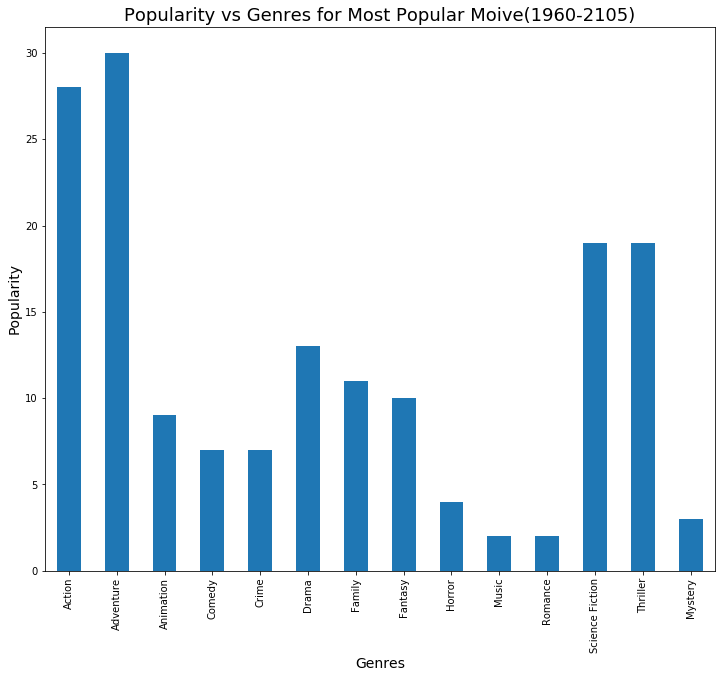

In [59]:
df_g['Col_sum'].plot(kind='bar',figsize=(12,10))
plt.title('Popularity vs Genres for Most Popular Moive(1960-2105)',fontsize=18)
plt.xlabel('Genres',fontsize=14)
plt.ylabel('Popularity',fontsize=14)


> 结论：通过上面的数据处理，我们知道：从1960年到2015年的66部最受欢迎的电影中，以下类型是数量最多的：Action，Adventure，Science Fiction，Thriller

### 研究问题 2（盈利最多的电影有哪些特点。）

In [55]:
df.head()

,original_title,popularity,genres,release_year,release_date,budget,revenue,cast,production_companies,g1,...,c1,c2,c3,c4,c5,p1,p2,p3,p4,p5
0,Jurassic World,32.985763,Action|Adventure|Science Fiction|Thriller,2015,6,150000000,1513528810,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Universal Studios|Amblin Entertainment|Legenda...,Action,...,Chris Pratt,Bryce Dallas Howard,Irrfan Khan,Vincent D'Onofrio,Nick Robinson,Universal Studios,Amblin Entertainment,Legendary Pictures,Fuji Television Network,Dentsu
1,Mad Max: Fury Road,28.419936,Action|Adventure|Science Fiction|Thriller,2015,5,150000000,378436354,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,Village Roadshow Pictures|Kennedy Miller Produ...,Action,...,Tom Hardy,Charlize Theron,Hugh Keays-Byrne,Nicholas Hoult,Josh Helman,Village Roadshow Pictures,Kennedy Miller Productions,0,0,0
2,Insurgent,13.112507,Adventure|Science Fiction|Thriller,2015,3,110000000,295238201,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Summit Entertainment|Mandeville Films|Red Wago...,Adventure,...,Shailene Woodley,Theo James,Kate Winslet,Ansel Elgort,Miles Teller,Summit Entertainment,Mandeville Films,Red Wagon Entertainment,NeoReel,0
3,Star Wars: The Force Awakens,11.173104,Action|Adventure|Science Fiction|Fantasy,2015,12,200000000,2068178225,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,Lucasfilm|Truenorth Productions|Bad Robot,Action,...,Harrison Ford,Mark Hamill,Carrie Fisher,Adam Driver,Daisy Ridley,Lucasfilm,Truenorth Productions,Bad Robot,0,0
4,Furious 7,9.335014,Action|Crime|Thriller,2015,4,190000000,1506249360,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,Universal Pictures|Original Film|Media Rights ...,Action,...,Vin Diesel,Paul Walker,Jason Statham,Michelle Rodriguez,Dwayne Johnson,Universal Pictures,Original Film,Media Rights Capital,Dentsu,One Race Films


In [56]:
#计算电影成本，并取出盈利最高的前10部电影
df['profit']=df['revenue']-df['budget']
df2=df.sort_values('profit',ascending=False).head(10)
df2

,original_title,popularity,genres,release_year,release_date,budget,revenue,cast,production_companies,g1,...,c2,c3,c4,c5,p1,p2,p3,p4,p5,profit
1386,Avatar,9.432768,Action|Adventure|Fantasy|Science Fiction,2009,12,237000000,2781505847,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Ingenious Film Partners|Twentieth Century Fox ...,Action,...,Zoe Saldana,Sigourney Weaver,Stephen Lang,Michelle Rodriguez,Ingenious Film Partners,Twentieth Century Fox Film Corporation,Dune Entertainment,Lightstorm Entertainment,0,2544505847
3,Star Wars: The Force Awakens,11.173104,Action|Adventure|Science Fiction|Fantasy,2015,12,200000000,2068178225,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,Lucasfilm|Truenorth Productions|Bad Robot,Action,...,Mark Hamill,Carrie Fisher,Adam Driver,Daisy Ridley,Lucasfilm,Truenorth Productions,Bad Robot,0,0,1868178225
5231,Titanic,4.355219,Drama|Romance|Thriller,1997,11,200000000,1845034188,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,Paramount Pictures|Twentieth Century Fox Film ...,Drama,...,Leonardo DiCaprio,Frances Fisher,Billy Zane,Kathy Bates,Paramount Pictures,Twentieth Century Fox Film Corporation,Lightstorm Entertainment,0,0,1645034188
0,Jurassic World,32.985763,Action|Adventure|Science Fiction|Thriller,2015,6,150000000,1513528810,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Universal Studios|Amblin Entertainment|Legenda...,Action,...,Bryce Dallas Howard,Irrfan Khan,Vincent D'Onofrio,Nick Robinson,Universal Studios,Amblin Entertainment,Legendary Pictures,Fuji Television Network,Dentsu,1363528810
4,Furious 7,9.335014,Action|Crime|Thriller,2015,4,190000000,1506249360,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,Universal Pictures|Original Film|Media Rights ...,Action,...,Paul Walker,Jason Statham,Michelle Rodriguez,Dwayne Johnson,Universal Pictures,Original Film,Media Rights Capital,Dentsu,One Race Films,1316249360
4361,The Avengers,7.637767,Science Fiction|Action|Adventure,2012,4,220000000,1519557910,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,Marvel Studios,Science Fiction,...,Chris Evans,Mark Ruffalo,Chris Hemsworth,Scarlett Johansson,Marvel Studios,0,0,0,0,1299557910
3374,Harry Potter and the Deathly Hallows: Part 2,5.711315,Adventure|Family|Fantasy,2011,7,125000000,1327817822,Daniel Radcliffe|Rupert Grint|Emma Watson|Alan...,Warner Bros.|Heyday Films|Moving Picture Compa...,Adventure,...,Rupert Grint,Emma Watson,Alan Rickman,Maggie Smith,Warner Bros.,Heyday Films,Moving Picture Company (MPC),0,0,1202817822
14,Avengers: Age of Ultron,5.944927,Action|Adventure|Science Fiction,2015,4,280000000,1405035767,Robert Downey Jr.|Chris Hemsworth|Mark Ruffalo...,Marvel Studios|Prime Focus|Revolution Sun Studios,Action,...,Chris Hemsworth,Mark Ruffalo,Chris Evans,Scarlett Johansson,Marvel Studios,Prime Focus,Revolution Sun Studios,0,0,1125035767
5422,Frozen,6.112766,Animation|Adventure|Family,2013,11,150000000,1274219009,Kristen Bell|Idina Menzel|Jonathan Groff|Josh ...,Walt Disney Pictures|Walt Disney Animation Stu...,Animation,...,Idina Menzel,Jonathan Groff,Josh Gad,Santino Fontana,Walt Disney Pictures,Walt Disney Animation Studios,0,0,0,1124219009
8094,The Net,1.136610,Crime|Drama|Mystery|Thriller|Action,1995,7,22000000,1106279658,Sandra Bullock|Jeremy Northam|Dennis Miller|We...,Columbia Pictures,Crime,...,Jeremy Northam,Dennis Miller,Wendy Gazelle,Ken Howard,Columbia Pictures,0,0,0,0,1084279658


Text(0.5,1,'Profit vs Genres (Top 10 Best profit Movie)')

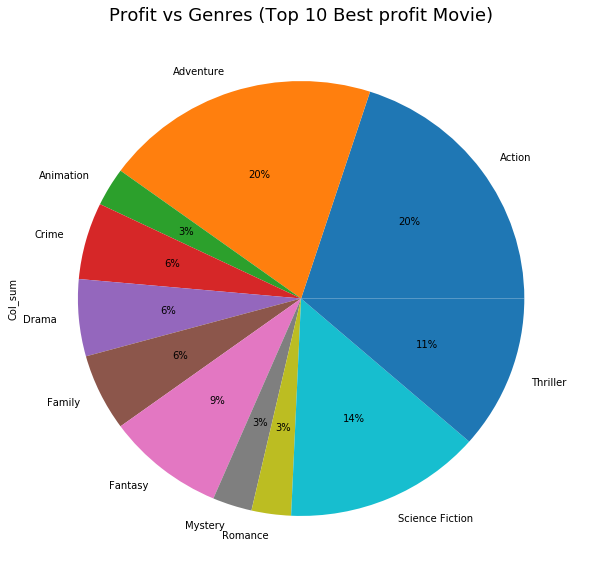

In [61]:
#（1）查看这10部电影与genres有哪些关系：
df2_g=(df2[['g1','g2','g3','g4','g5']] ).apply(pd.value_counts)   

#去掉没有意义的倒数第二行
df2_g.drop([0], inplace=True)

#填充nan值，方便计算
df2_g.fillna(0, inplace=True)

df2_g['Col_sum'] = df2_g.apply(lambda x: x.sum(), axis=1)

df2_g['Col_sum'].plot(kind='pie',figsize=(10,10),autopct='%.0f%%')

plt.title('Profit vs Genres (Top 10 Best profit Movie)',fontsize=18)


> 结论（1）：通过上面的数据处理，我们知道：盈利最多的10部电影中，以下类型是数量最多的：Action，Adventure，Science Fiction，Thriller

Text(0.5,0,'Cast Name')

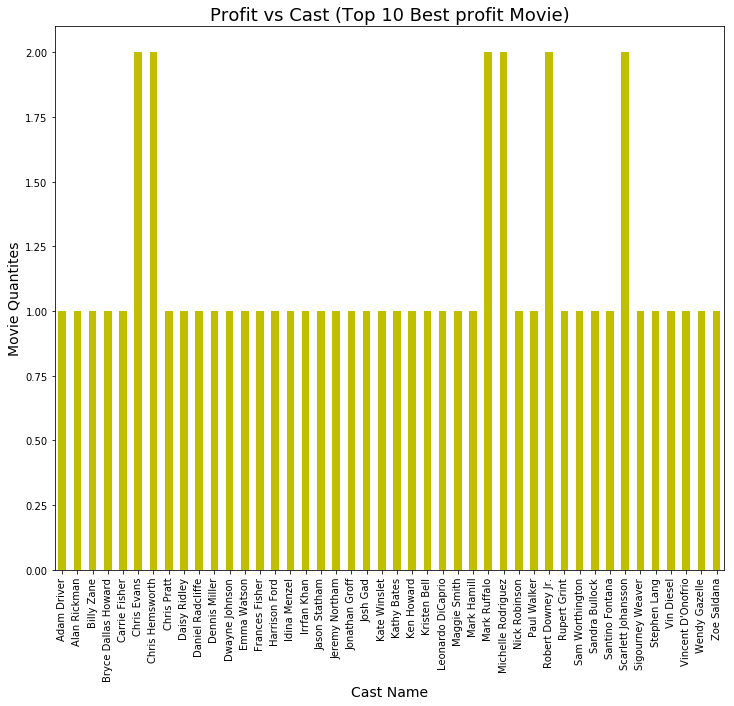

In [74]:
#（2）查看这10部电影与cast有哪些关系：
df2_c=(df2[['c1','c2','c3','c4','c5']] ).apply(pd.value_counts)   


#填充nan值，方便计算
df2_c.fillna(0, inplace=True)

df2_c['Col_sum'] = df2_c.apply(lambda x: x.sum(), axis=1)

df2_c['Col_sum'].plot(kind='bar',figsize=(12,10),color='y')

plt.title('Profit vs Cast (Top 10 Best profit Movie)',fontsize=18)
plt.ylabel('Movie Quantites',fontsize=14)
plt.xlabel('Cast Name',fontsize=14)

>> 结论（2）：通过上面的数据处理，我们知道：盈利最多的10部电影中，以下演员参演过2部最受欢迎的电影：Chris Evans，Chris hemsworth，Mark Ruffalo，Michellw Rodriguez，Robert Downey，Scarlett Johansson

Text(0.5,0,'Production Companies')

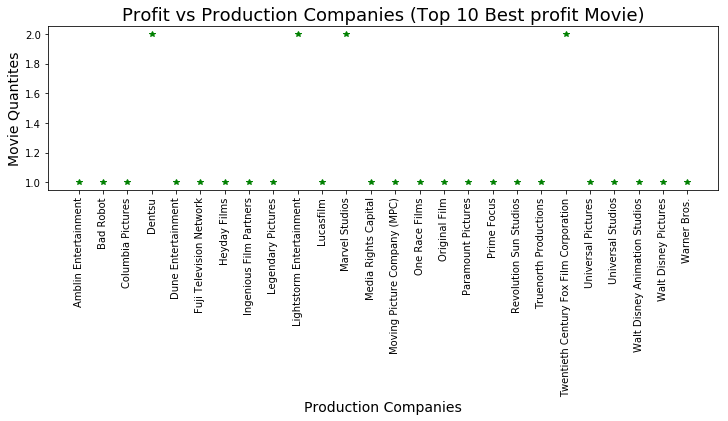

In [97]:
#（3）查看这10部电影production companies有哪些特征：
df2_p=(df2[['p1','p2','p3','p4','p5']] ).apply(pd.value_counts)   

#去掉没有意义的行
df2_p.drop([0], inplace=True)

#填充nan值，方便计算
df2_p.fillna(0, inplace=True)

df2_p['Col_sum'] = df2_p.apply(lambda x: x.sum(), axis=1)

#df2_p['Col_sum'].plot(kind='point',figsize=(12,10),color='g')

plt.figure(figsize=(12, 3))
plt.plot(df2_p['Col_sum'],'*',color='g')
plt.xticks(rotation=90)

plt.title('Profit vs Production Companies (Top 10 Best profit Movie)',fontsize=18)
plt.ylabel('Movie Quantites',fontsize=14)
plt.xlabel('Production Companies',fontsize=14)

> 结论（3）：通过上面的数据处理，我们知道：盈利最多的10部电影中，以下公司投资过2部最受欢迎的电影：Marvel Studio，Twentieth Century Fox Film Corporation，Lightstorm Enteratinment,Dentsu

Text(0.5,0,'Profit')

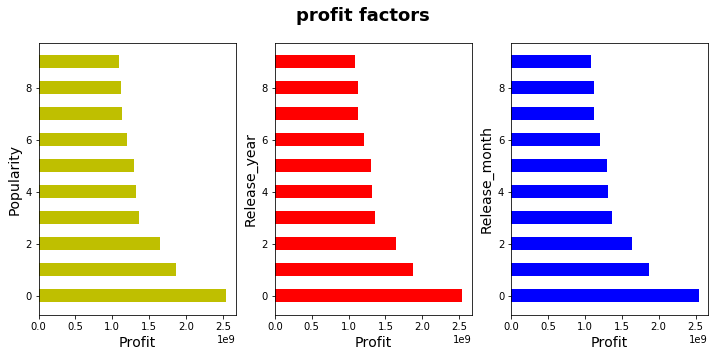

In [102]:
#（4）查看这10部电影与popularity，release_year，release_date有哪些关系

#plt.barh(np.arange(10),df2['profit'],tick_label=df2['popularity'])
#plt.xlabel('Profit')
#plt.ylabel('Popularity')

#设置画布大小
fig = plt.figure(figsize=(12,5)) 
#加上图像标题, fontsize=14 字体大小, fontweight='bold' 加粗
fig.suptitle('profit factors', fontsize=18, fontweight='bold') 

#添加第一个子图
ax1 = fig.add_subplot(131)
plt.barh(np.arange(10), df2['profit'], height=0.5, color='y')
plt.ylabel('Popularity',fontsize=14) 
plt.xlabel('Profit',fontsize=14) 

#添加第二个子图
ax2 = fig.add_subplot(132)
plt.barh(np.arange(10),df2['profit'], height=0.5,color='r')
plt.ylabel('Release_year',fontsize=14) 
plt.xlabel('Profit',fontsize=14)

#添加第三个子图
ax3 = fig.add_subplot(133)
plt.barh(np.arange(10),df2['profit'], height=0.5,color='b')
plt.ylabel('Release_month',fontsize=14) 
plt.xlabel('Profit',fontsize=14)



> 从上面的图形中并不能直观的看出联系，所以我们对数据进行进一步处理：

In [103]:
df2['popularity'].mean()


9.3825252999999993

> 结论（4.1）：通过上面的数据处理，我们知道：盈利最多的10部电影,受欢迎的平均程度为9.4分，

In [104]:
df2['release_year'].value_counts()

2015    4
1995    1
1997    1
2012    1
2011    1
2009    1
2013    1
Name: release_year, dtype: int64

> 结论（4.2）：通过上面的数据处理，我们知道：盈利最多的10部电影,有4部电影出自2015年。

In [105]:
df2['release_date'].value_counts()

4     3
12    2
11    2
7     2
6     1
Name: release_date, dtype: int64

> 结论（4.3）：通过上面的数据处理，我们知道：盈利最多的10部电影,4月份上映的有3部，7，11，12月各自2部。

<a id='conclusions'></a>
## 结论

> 通过上面的数据处理，我们知道：从1960年到2015年的66部最受欢迎的电影中，以下类型是数量最多的：Action，Adventure，Science Fiction，Thriller

> 通过上面的数据处理，我们知道：盈利最多的10部电影中:
>> (1)以下类型是数量最多的：Action，Adventure，Science Fiction，Thriller
>> (2)以下演员参演过2部最受欢迎的电影：Chris Evans，Chris hemsworth，Mark Ruffalo，Michellw Rodriguez，Robert Downey，Scarlett Johansson
>> (3)以下公司投资过2部最受欢迎的电影：Marvel Studio，Twentieth Century Fox Film Corporation，Lightstorm Enteratinment,Dentsu
>> (4)受欢迎的平均程度为9.4分，
>> (5)有4部电影出自2015年。
>> (6)4月份上映的有3部，7，11，12月各自2部。


> 问题探讨：

>> （1）对于上面两个问题，我都是提取的相关列组成新的数据集进行处理，这样大大简化了程序的运行时间和过程。我认为这个数据子集是比较充分，足以支撑我的结论的。尤其是对于第一个问题的探索分析，已经非常全面了。
>> (2) 对于第二个问题的分析，我不算很满意，因为所得到的特点过于繁杂和零碎。我认为出现这种情况的原因可能有以下几点：
>>> (a) 盈利最多的top10的电影，相对来说，特点比较分散，不容易总结归纳。也许把探索范围改成top100的电影，他的特点和趋势会更容易展现出来。
>>> (b) 在计算中，只考虑到盈利的数字意思，但是整个dataframe是从1960~2015年，应该要考虑到通货膨胀，货币升值、贬值之类的因素，来使得数据更具有现实应用意义


In [106]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

255